In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
train_dir = '/content/drive/MyDrive/train '
test_dir = '/content/drive/MyDrive/test'

In [10]:
import os
print(len(os.listdir('/content/drive/MyDrive/train /penguins')))
print(len(os.listdir('/content/drive/MyDrive/train /turtles')))
print(len(os.listdir('/content/drive/MyDrive/test/penguins')))
print(len(os.listdir('/content/drive/MyDrive/test/turtles')))

550
557
200
200


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 886 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [12]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
28/28 [==============================] - 340s 12s/step - loss: 0.8713 - accuracy: 0.6016 - val_loss: 0.5770 - val_accuracy: 0.7014
Epoch 2/30
28/28 [==============================] - 219s 8s/step - loss: 0.4898 - accuracy: 0.7822 - val_loss: 0.4622 - val_accuracy: 0.7783
Epoch 3/30
28/28 [==============================] - 230s 8s/step - loss: 0.3434 - accuracy: 0.8612 - val_loss: 0.4228 - val_accuracy: 0.8326
Epoch 4/30
28/28 [==============================] - 224s 8s/step - loss: 0.2836 - accuracy: 0.8871 - val_loss: 0.4550 - val_accuracy: 0.8462
Epoch 5/30
28/28 [==============================] - 230s 8s/step - loss: 0.1790 - accuracy: 0.9357 - val_loss: 0.4822 - val_accuracy: 0.8462
Epoch 6/30
28/28 [==============================] - 221s 8s/step - loss: 0.1518 - accuracy: 0.9424 - val_loss: 0.4846 - val_accuracy: 0.8054
Epoch 7/30
28/28 [==============================] - 249s 9s/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.9264 - val_accuracy: 0.8145
Epoch 8/30
2

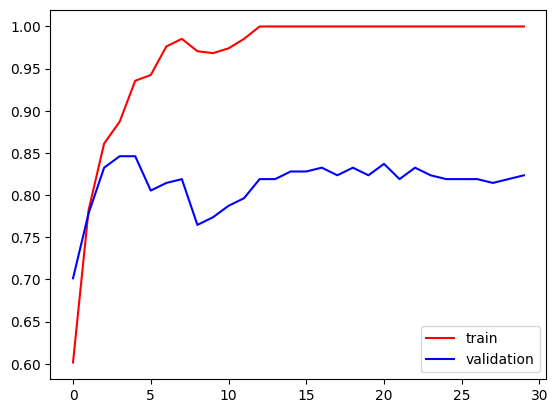

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

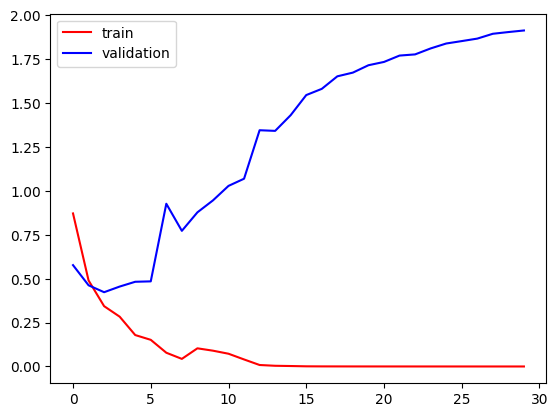

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'

)

Found 399 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)
print(predictions)

13/13 [==============================] - 94s 7s/step
[[7.71682154e-17]
 [1.08527097e-10]
 [2.79664683e-08]
 [1.00000000e+00]
 [9.91840005e-01]
 [3.08779044e-13]
 [9.99960899e-01]
 [1.61820356e-06]
 [1.63179159e-09]
 [1.80420318e-10]
 [1.72454941e-06]
 [4.36670271e-05]
 [2.79729487e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99997616e-01]
 [9.99874413e-01]
 [7.30487404e-09]
 [1.00000000e+00]
 [3.04382013e-07]
 [9.99991179e-01]
 [9.87764835e-01]
 [9.99828637e-01]
 [1.21541317e-14]
 [9.99467909e-01]
 [9.01067155e-12]
 [3.98748282e-14]
 [9.87443686e-01]
 [1.00000000e+00]
 [6.25063421e-06]
 [1.00000000e+00]
 [9.99998450e-01]
 [1.00000000e+00]
 [9.99320149e-01]
 [1.00000000e+00]
 [9.99997973e-01]
 [1.00000000e+00]
 [9.94871977e-14]
 [3.83596510e-01]
 [5.64198315e-01]
 [5.39943485e-08]
 [4.53112096e-01]
 [9.99999821e-01]
 [9.84775901e-01]
 [3.22647870e-01]
 [1.00000000e+00]
 [9.99997616e-01]
 [9.99997556e-01]
 [1.00000000e+00]
 [9.99992192e-01]
 [1.00000000e+00]
 [9.99934018e-01]
 [1.4720913

In [20]:
len(predictions)

399

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 89 110]
 [100 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       199
           1       0.48      0.50      0.49       200

    accuracy                           0.47       399
   macro avg       0.47      0.47      0.47       399
weighted avg       0.47      0.47      0.47       399



***pre-trained CNN model***

In [23]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                  input_shape = (256,256,3),
                                                  pooling = 'max', classes = 2,
                                                  weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [24]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [25]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
28/28 [==============================] - 367s 13s/step - loss: 1.7773 - accuracy: 0.6106 - val_loss: 0.5971 - val_accuracy: 0.7149
Epoch 2/3
28/28 [==============================] - 346s 12s/step - loss: 0.6764 - accuracy: 0.7020 - val_loss: 0.5661 - val_accuracy: 0.7285
Epoch 3/3
28/28 [==============================] - 350s 12s/step - loss: 0.4950 - accuracy: 0.7686 - val_loss: 0.7542 - val_accuracy: 0.6652


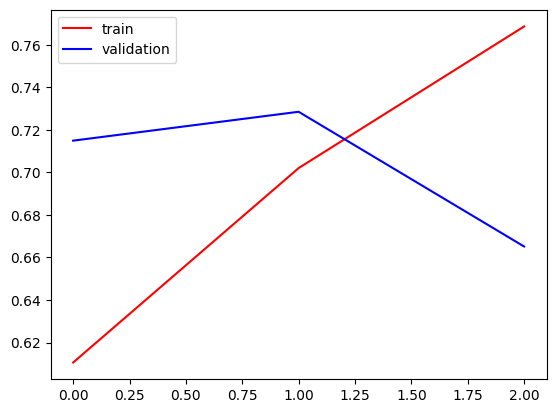

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

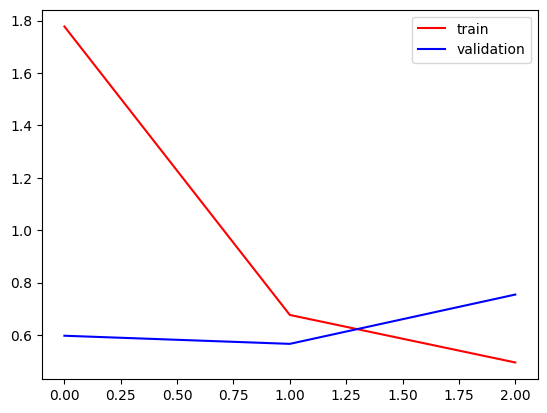

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 399 images belonging to 2 classes.


In [31]:
predictions = resnet_model.predict(test_data)
print(predictions)

13/13 [==============================] - 126s 9s/step
[[9.93859231e-01]
 [9.60124969e-01]
 [7.70140529e-01]
 [8.65252137e-01]
 [6.31729066e-01]
 [1.04112318e-02]
 [9.82464075e-01]
 [2.14171503e-02]
 [3.44973654e-02]
 [7.56311476e-01]
 [9.76081491e-01]
 [4.71586317e-01]
 [1.34676725e-01]
 [9.35635567e-01]
 [9.52716589e-01]
 [9.61197615e-01]
 [9.67499375e-01]
 [1.84642908e-03]
 [1.44757302e-02]
 [8.96091402e-01]
 [9.14002895e-01]
 [9.68891442e-01]
 [9.48047936e-01]
 [9.27331269e-01]
 [9.75093842e-01]
 [9.80684996e-01]
 [8.58446121e-01]
 [5.07770851e-02]
 [9.35506880e-01]
 [8.81348848e-01]
 [2.89205258e-04]
 [9.23300624e-01]
 [9.96183813e-01]
 [3.87557559e-02]
 [9.16074872e-01]
 [8.27316642e-01]
 [7.79219449e-01]
 [9.47734535e-01]
 [9.32368517e-01]
 [9.21252489e-01]
 [9.19770241e-01]
 [9.59840536e-01]
 [9.68589365e-01]
 [7.04828999e-04]
 [3.29324663e-01]
 [9.56631899e-01]
 [5.83466530e-01]
 [9.95170176e-02]
 [8.76350522e-01]
 [9.54952121e-01]
 [9.53664422e-01]
 [8.46236527e-01]
 [9.825409

In [32]:
len(predictions)

399

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 62 137]
 [ 71 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       199
           1       0.48      0.65      0.55       200

    accuracy                           0.48       399
   macro avg       0.48      0.48      0.46       399
weighted avg       0.48      0.48      0.46       399

